In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, probabilities):
        self.probabilities = probabilities
        
    def draw(self, action):
        if np.random.rand() <= self.probabilities[action]:
            return 1
        return 0

class BanditAgent:
    # constructor
    def __init__(self, n_action):
        self.n_action = n_action
        self.mu_list = np.zeros(n_action)
        self.action_select_num = np.zeros(n_action)
        self.reward_sum = np.zeros(n_action)
        self.total_play_num = 0
        self.select_action_log = []
        
    # public
    def greedy_action(self):
        action = -1
        if np.max(self.mu_list) == 0:
            action = np.random.randint(0, self.n_action)    
        else:
            action = np.argmax(self.mu_list)
        return action

    def e_greedy_action(self, e):
        action = -1
        if np.random.rand() <= e or np.max(self.mu_list) == 0:
            action = np.random.randint(0, self.n_action)    
        else:
            action = np.argmax(self.mu_list)
        return action
    
    def ubc1(self):
        action = -1
        if np.max(self.mu_list) == 0:
            action = np.random.randint(0, self.n_action)    
        else:
            ulist = np.sqrt(2*np.log(self.total_play_num)/self.action_select_num)
            values = self.mu_list + ulist
            action = np.argmax(values)
        return action
    
    def update(self, action, reward):
        self.total_play_num += 1
        self.action_select_num[action] += 1
        self.select_action_log.append(action)
        
        self.reward_sum[action] += reward
        self.mu_list[action] = self.reward_sum[action] / self.action_select_num[action]


        
    

In [2]:
# bandit test
machines = Bandit([0.1, 0.2, 0.5])
actions = []
for i in range(10000):
    actions.append(machines.draw(0))
print(np.average(np.array(actions)))
actions = []
for i in range(10000):
    actions.append(machines.draw(1))
print(np.average(np.array(actions)))
actions = []
for i in range(10000):
    actions.append(machines.draw(2))
print(np.average(np.array(actions)))

0.1045
0.1977
0.5087


In [3]:
# 環境設定
probabilities = [0.2, 0.3, 0.4, 0.5]
epoc = 100
n_step = 10000
n_action = len(probabilities)
machines = Bandit(probabilities)
e = 0.1 # イプシロン

# greedy

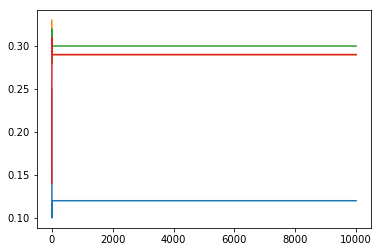

In [4]:
select_bandit_log = None
for ep in range(epoc):
    agent = BanditAgent(n_action)
    for i in range(n_step):
        action = agent.greedy_action()
        reward = machines.draw(action)
        agent.update(action, reward)
   # plt.plot(agent.select_action_log)
   # plt.show()
    if select_bandit_log is None:
        select_bandit_log = np.array(agent.select_action_log).reshape((-1, 1))
    else:
        select_bandit_log = np.hstack((select_bandit_log, np.array(agent.select_action_log).reshape((-1, 1))))

# plt.plot(select_bandit_log)
# plt.show()

n_action_log = []
for i in range(len(select_bandit_log)):
    actions = []
    arr = select_bandit_log[i]
    for a in range(n_action):
        actions.append(len(np.where(arr==a)[0]))
    n_action_log.append(actions)
n_action_log = np.array(n_action_log)
plt.plot(n_action_log/epoc)
plt.show()


# e-greedy

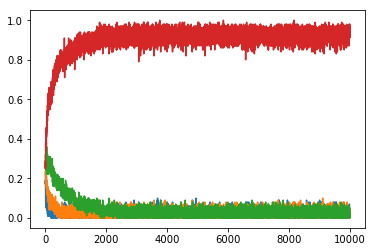

In [5]:

select_bandit_log = None
for ep in range(epoc):
    agent = BanditAgent(n_action)
    for i in range(n_step):
        action = agent.e_greedy_action(e)
        reward = machines.draw(action)
        agent.update(action, reward)
   # plt.plot(agent.select_action_log)
   # plt.show()
    if select_bandit_log is None:
        select_bandit_log = np.array(agent.select_action_log).reshape((-1, 1))
    else:
        select_bandit_log = np.hstack((select_bandit_log, np.array(agent.select_action_log).reshape((-1, 1))))

# plt.plot(select_bandit_log)
# plt.show()

n_action_log = []
for i in range(len(select_bandit_log)):
    actions = []
    arr = select_bandit_log[i]
    for a in range(n_action):
        actions.append(len(np.where(arr==a)[0]))
    n_action_log.append(actions)
n_action_log = np.array(n_action_log)
plt.plot(n_action_log/epoc)
plt.show()


# UBC1

C:\Users\keijisato\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\keijisato\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


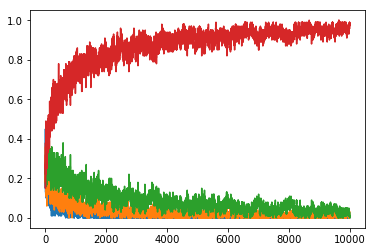

In [6]:

select_bandit_log = None
for ep in range(epoc):
    agent = BanditAgent(n_action)
    for i in range(n_step):
        action = agent.ubc1()
        reward = machines.draw(action)
        agent.update(action, reward)
   # plt.plot(agent.select_action_log)
   # plt.show()
    if select_bandit_log is None:
        select_bandit_log = np.array(agent.select_action_log).reshape((-1, 1))
    else:
        select_bandit_log = np.hstack((select_bandit_log, np.array(agent.select_action_log).reshape((-1, 1))))

# plt.plot(select_bandit_log)
# plt.show()

n_action_log = []
for i in range(len(select_bandit_log)):
    actions = []
    arr = select_bandit_log[i]
    for a in range(n_action):
        actions.append(len(np.where(arr==a)[0]))
    n_action_log.append(actions)
n_action_log = np.array(n_action_log)
plt.plot(n_action_log/epoc)
plt.show()
